In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


In [31]:
data = pd.read_csv('/kaggle/input/car-evaluation-data-set/car_evaluation.csv', header=None)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [39]:
data.columns = ['Price', 'Maintenance Cost', 'Number of Doors', 'Capacity', 'Size of Luggage Boot', 'safety', 'Decision']
data.head()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [53]:
data.tail()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [40]:
data.shape

(1728, 7)

In [33]:
data.isnull().sum().sort_values(ascending=False)

Price                   0
Maintenance Cost        0
Number of Doors         0
Capacity                0
Size of Luggage Boot    0
safety                  0
Decision                0
dtype: int64

<AxesSubplot:>

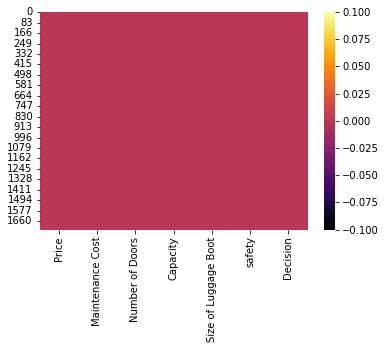

In [34]:
import seaborn as sns

sns.heatmap(data.isnull(), cmap='inferno')

In [35]:
print(data['Decision'].nunique())
print(data['Decision'].unique())

4
['unacc' 'acc' 'vgood' 'good']


In [36]:
data.duplicated().any()

False

<AxesSubplot:xlabel='Decision', ylabel='Count'>

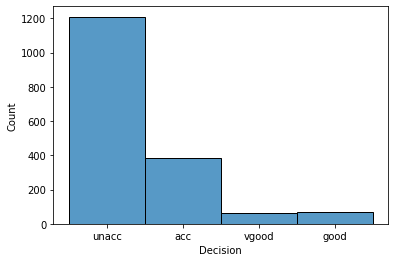

In [37]:
sns.histplot(data['Decision'])

In [54]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

#data['Size of Luggage Boot'].replace(('small', 'med', 'big'), (0, 1, 2), inplace = True)
#data['safety'].replace(('low', 'med', 'high'), (0, 1, 2), inplace = True)
#data['Price'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
#data['Maintenance Cost'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
#data.Decision.replace(('unacc', 'acc', 'good', 'vgood'), (0, 1, 2, 3), inplace = True)

In [56]:
data.tail()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1
1727,1,1,3,2,0,0,3


In [58]:
X = data.drop(columns=['Decision']).values
y = data['Decision'].values

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
X_train.shape

(1382, 6)

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()

classifiers = [('Decision Tree', dt),
               ('K Nearest Neighbors', knn),
               ('Logistic Regression', lr)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf_name, ': ', accuracy_score(y_test, y_pred))

Decision Tree :  0.976878612716763
K Nearest Neighbors :  0.930635838150289
Logistic Regression :  0.7196531791907514


In [61]:
#Ensemble

from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

print('Voting classifier ', accuracy_score(y_test, y_pred))

Voting classifier  0.9335260115606936
